# Correlation Vs Difference Of Means
```
Hardware: 
['Generic Settings', 'Scope Module', 'ChipWhisperer/OpenADC']
['OpenADC Interface', 'connection', 'FTDI (SASEBO-W/SAKURA-G)']
['Generic Settings', 'Target Module', 'SAKURA G']
['Generic Settings', 'Target Frequency', '48M']
['Generic Settings', 'Trace Format', 'Numpy']
['Key/Text Pattern', 'Plaintext', 'Fixed']
['OpenADC', 'Trigger Setup', 'Total Samples', 3000]
['OpenADC', 'Trigger Setup', 'Offset', 0]
['OpenADC', 'Gain Setting', 'Setting', 40]
['OpenADC', 'Trigger Setup', 'Mode', 'falling edge']
['OpenADC', 'Clock Setup', 'CLKGEN Settings', 'Divide', 4]
['OpenADC', 'Clock Setup', 'ADC Clock', 'Source', 'CLKGEN x1 via DCM']
```

In [19]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy, version_information

Software versions
Python 2.7.10 64bit [GCC 5.2.1 20151010]
IPython 5.0.0
OS Linux 4.2.0 42 generic x86_64 with Ubuntu 15.10 wily
numpy 1.8.2
scipy 0.14.1
matplotlib 1.4.2
sympy 0.7.6
version_information 1.0.3
Sat Sep 24 06:14:47 2016 UTC

## Loading Traces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import scipy.io
import scipy.stats
mat = scipy.io.loadmat(r'HD_1to15_1000000.mat')

In [25]:
import tables
file = tables.openFile(r'traces_1000000t_800s_UDRPG_8_3_gain45')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: openFile() is pending deprecation, use open_file() instead. You may use the pt2to3 tool to update your source code.
  from ipykernel import kernelapp as app


In [30]:
varname = 'traces'
?file.listNodes()

In [13]:
import h5py
mat2 = h5py.File(r'traces_1000000t_800s_UDRPG_8_3_gain45')

In [24]:
mat2.listnames()

AttributeError: 'File' object has no attribute 'listnames'

In [23]:
help(mat2)

Help on File in module h5py._hl.files object:

class File(h5py._hl.group.Group)
 |  Represents an HDF5 file.
 |  
 |  Method resolution order:
 |      File
 |      h5py._hl.group.Group
 |      h5py._hl.base.HLObject
 |      h5py._hl.base.CommonStateObject
 |      h5py._hl.base.MutableMappingHDF5
 |      h5py._hl.base.MappingHDF5
 |      _abcoll.MutableMapping
 |      _abcoll.Mapping
 |      _abcoll.Sized
 |      _abcoll.Iterable
 |      _abcoll.Container
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __enter__(...)
 |  
 |  __exit__(...)
 |  
 |  __init__(self, name, mode=None, driver=None, libver=None, userblock_size=None, swmr=False, **kwds)
 |      Create a new file object.
 |      
 |      See the h5py user guide for a detailed explanation of the options.
 |      
 |      name
 |          Name of the file on disk.  Note: for files created with the 'core'
 |          driver, HDF5 still requires this be non-empty.
 |      mode
 |          r        Readonly, file m

In [3]:
HD = mat['HD'][0]
type(HD), np.shape(HD),HD

(numpy.ndarray, (15L,), array([ array([[102, 100],
        [ 96, 102],
        [107, 100],
        ..., 
        [ 95, 108],
        [100,  94],
        [114,  97]], dtype=uint8),
        array([[115, 115],
        [101,  99],
        [ 99, 121],
        ..., 
        [115, 115],
        [ 92, 101],
        [ 95, 101]], dtype=uint8),
        array([[106,  96],
        [ 97,  92],
        [101,  93],
        ..., 
        [ 82,  89],
        [ 94,  91],
        [110, 102]], dtype=uint8),
        array([[ 90,  95],
        [105,  93],
        [106, 102],
        ..., 
        [ 91, 108],
        [ 95, 102],
        [ 99, 101]], dtype=uint8),
        array([[ 97, 101],
        [106, 107],
        [ 96,  93],
        ..., 
        [ 93, 105],
        [ 83, 112],
        [106,  91]], dtype=uint8),
        array([[107,  99],
        [102,  96],
        [101,  91],
        ..., 
        [100, 106],
        [100, 112],
        [109, 101]], dtype=uint8),
        array([[103, 100],
        [107,

In [4]:
HD[0][0:5,:], np.shape(HD[0])

(array([[102, 100],
        [ 96, 102],
        [107, 100],
        [100, 106],
        [100, 101]], dtype=uint8), (1000000L, 2L))

In [5]:
#traces = np.load(r'Traces/unpro-rivfk_traces.npy')
traces = np.load(r'udrpg-rivfk_traces.npy')
#traces = np.load(r'Traces/udrpg-couple-rivfk_traces.npy')
#traces = np.load(r'Traces/dcro-rivfk_traces.npy')
#traces = np.load(r'Traces/cr-rivfk_traces.npy')
#traces = np.load(r'Traces/dcro-new-rivfk_traces.npy')

In [6]:
P = -traces
D = np.shape(P)[0]
T = np.shape(P)[1]
R = np.zeros(shape=(2,T))
D,T

(10000L, 792L)

(0.023536681133232276, 0.022430733158739939)
K0 is 0
(0.024617635967148672, 0.028084366681592907)
K1 is 1
(0.024660665548517445, 0.025242251587555289)
K2 is 1
(0.032674123560149711, 0.029878013475677343)
K3 is 0
(0.029410146580807487, 0.024895163883788603)
K4 is 0
(0.027486975650813372, 0.015336764274425166)
K5 is 0
(0.019318130162500995, 0.033290608403953481)
K6 is 1
(0.045253593246820246, 0.012964547375446221)
K7 is 0
(0.028097499139281445, 0.01607906031486573)
K8 is 0
(0.035789602273374896, 0.025931663437041889)
K9 is 0
(0.027116565064005543, 0.031316432075603216)
K10 is 1
(0.0191727485890721, 0.055728151869776109)
K11 is 1
(0.023802871681056818, 0.027577645319974781)
K12 is 1
(0.027115392620774066, 0.036323659951942318)
K13 is 1
(0.043688096249083833, 0.027147600406701146)
K14 is 0


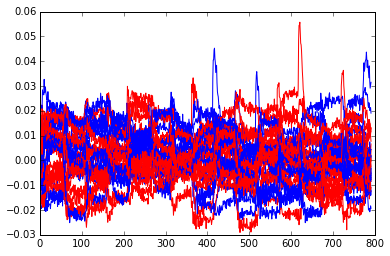

In [6]:
for Ki in range(0,15):    #Ki = 1~80
    #*****************************
    # calculate Hamming Distance Hypothesis H=[D*2]
    # D: # IVs
    # 2: key bit = 0 or 1
    #*****************************
    H = HD[Ki][0:D,:];

    #
    #*****************************
    #calculate correlation coefficient Matrix R=[2*T]
    #2: key bit = 0 or 1
    #T: # samplePoint
    #*****************************
    
    for i in range(T):
        tmp1 = scipy.stats.pearsonr( H[:,0], P[:,i]);
        tmp2 = scipy.stats.pearsonr( H[:,1], P[:,i]);
        R[0,i] = tmp1[0];
        R[1,i] = tmp2[0];
    print (max(R[0]), max(R[1]))
    if max(R[0]) > max(R[1]):
        print "K%d is 0"%Ki
    else:
        print "K%d is 1"%Ki
    plt.plot( R[0,:],'b-')
    plt.plot( R[1,:],'r-')

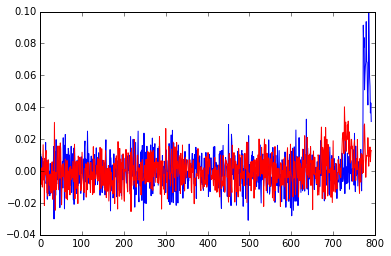

In [11]:
R_max = np.zeros(shape=(2,1000000))
R = np.zeros(shape=(2,792))
H = HD[0][0:D,:]

for d in range(0,1000000,500):

    #*****************************
    # calculate correlation coefficient Matrix R=[2*T]
    # 2: key bit = 0 or 1
    # T: # samplePoint
    #*****************************
    
    for i in range(T): # T = size(P,2)
        tmp1 = scipy.stats.pearsonr( H[0:d,0], P[0:d,i])
        tmp2 = scipy.stats.pearsonr( H[0:d,1], P[0:d,i])
        R[0,i] = tmp1[0]
        R[1,i] = tmp2[0]
        #tmp1 = corrcoef( [H(1:d,1)  P(1:d,i)]);
        #tmp2 = corrcoef( [H(1:d,2)  P(1:d,i)]);
        #R(1,i) = tmp1(1,2);
        #R(2,i) = tmp2(1,2);
    R_max[0,d] = max( R[0,:])
    R_max[1,d] = max( R[1,:])
    if (d % 5000) == 0:
        print 'd=%d, R1max=%f, R2max=%f\n'%(d,R_max[0,d],R_max[1,d])

d=0, R1max=nan, R2max=nan

d=5000, R1max=0.019206, R2max=0.019112

d=10000, R1max=0.017346, R2max=0.016376

d=15000, R1max=0.017346, R2max=0.016376

d=20000, R1max=0.017346, R2max=0.016376

d=25000, R1max=0.017346, R2max=0.016376

d=30000, R1max=0.017346, R2max=0.016376

d=35000, R1max=0.017346, R2max=0.016376

d=40000, R1max=0.017346, R2max=0.016376

d=45000, R1max=0.017346, R2max=0.016376

d=50000, R1max=0.017346, R2max=0.016376

d=55000, R1max=0.017346, R2max=0.016376

d=60000, R1max=0.017346, R2max=0.016376

d=65000, R1max=0.017346, R2max=0.016376

d=70000, R1max=0.017346, R2max=0.016376

d=75000, R1max=0.017346, R2max=0.016376

d=80000, R1max=0.017346, R2max=0.016376

d=85000, R1max=0.017346, R2max=0.016376

d=90000, R1max=0.017346, R2max=0.016376

d=95000, R1max=0.017346, R2max=0.016376

d=100000, R1max=0.017346, R2max=0.016376

d=105000, R1max=0.017346, R2max=0.016376

d=110000, R1max=0.017346, R2max=0.016376

d=115000, R1max=0.017346, R2max=0.016376

d=120000, R1max=0.017346, R

KeyboardInterrupt: 

(0, 0.1)

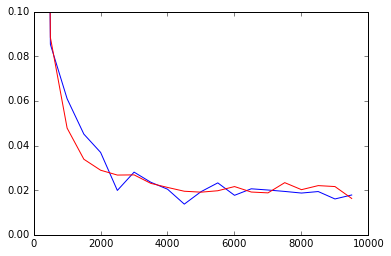

In [9]:
plt.plot(range(2,10000,500),R_max[0,range(2,10000,500)],'b-')
plt.plot(range(2,10000,500),R_max[1,range(2,10000,500)],'r-')
plt.ylim([0, 0.1])

The target key is ``2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c``

In [9]:
knownkey = np.load(r'Traces/2013.11.14-12.33.38_knownkey.npy')
"".join(["%02x "%k for k in knownkey])

'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c '

In [10]:
np.shape(traces[0])

(3000,)

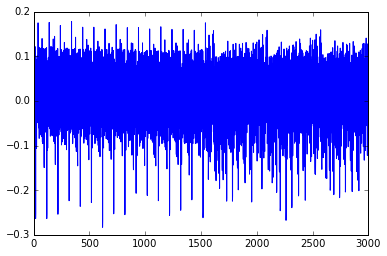

In [11]:
plt.plot(traces[0])

## AES Model

In [12]:
sbox=(
    0x63,0x7c,0x77,0x7b,0xf2,0x6b,0x6f,0xc5,0x30,0x01,0x67,0x2b,0xfe,0xd7,0xab,0x76,
    0xca,0x82,0xc9,0x7d,0xfa,0x59,0x47,0xf0,0xad,0xd4,0xa2,0xaf,0x9c,0xa4,0x72,0xc0,
    0xb7,0xfd,0x93,0x26,0x36,0x3f,0xf7,0xcc,0x34,0xa5,0xe5,0xf1,0x71,0xd8,0x31,0x15,
    0x04,0xc7,0x23,0xc3,0x18,0x96,0x05,0x9a,0x07,0x12,0x80,0xe2,0xeb,0x27,0xb2,0x75,
    0x09,0x83,0x2c,0x1a,0x1b,0x6e,0x5a,0xa0,0x52,0x3b,0xd6,0xb3,0x29,0xe3,0x2f,0x84,
    0x53,0xd1,0x00,0xed,0x20,0xfc,0xb1,0x5b,0x6a,0xcb,0xbe,0x39,0x4a,0x4c,0x58,0xcf,
    0xd0,0xef,0xaa,0xfb,0x43,0x4d,0x33,0x85,0x45,0xf9,0x02,0x7f,0x50,0x3c,0x9f,0xa8,
    0x51,0xa3,0x40,0x8f,0x92,0x9d,0x38,0xf5,0xbc,0xb6,0xda,0x21,0x10,0xff,0xf3,0xd2,
    0xcd,0x0c,0x13,0xec,0x5f,0x97,0x44,0x17,0xc4,0xa7,0x7e,0x3d,0x64,0x5d,0x19,0x73,
    0x60,0x81,0x4f,0xdc,0x22,0x2a,0x90,0x88,0x46,0xee,0xb8,0x14,0xde,0x5e,0x0b,0xdb,
    0xe0,0x32,0x3a,0x0a,0x49,0x06,0x24,0x5c,0xc2,0xd3,0xac,0x62,0x91,0x95,0xe4,0x79,
    0xe7,0xc8,0x37,0x6d,0x8d,0xd5,0x4e,0xa9,0x6c,0x56,0xf4,0xea,0x65,0x7a,0xae,0x08,
    0xba,0x78,0x25,0x2e,0x1c,0xa6,0xb4,0xc6,0xe8,0xdd,0x74,0x1f,0x4b,0xbd,0x8b,0x8a,
    0x70,0x3e,0xb5,0x66,0x48,0x03,0xf6,0x0e,0x61,0x35,0x57,0xb9,0x86,0xc1,0x1d,0x9e,
    0xe1,0xf8,0x98,0x11,0x69,0xd9,0x8e,0x94,0x9b,0x1e,0x87,0xe9,0xce,0x55,0x28,0xdf,
    0x8c,0xa1,0x89,0x0d,0xbf,0xe6,0x42,0x68,0x41,0x99,0x2d,0x0f,0xb0,0x54,0xbb,0x16)

In [13]:
def intermediate(pt, keyguess):
    return sbox[pt ^ keyguess]

In [14]:
HW = [bin(n).count("1") for n in range(0,256)]

## Correlation Coefficient

In [15]:
#Set 16 to something lower (like 1) to only go through a single subkey
bestguess = [0]*16
pge = [256]*16
for bnum in range(0, 1):
    cpaoutput = [0]*256
    maxcpa = [0]*256
    for kguess in range(0, 256):
        print "Subkey %2d, hyp = %02x: "%(bnum, kguess),


        #Initialize arrays & variables to zero
        sumnum = np.zeros(numpoint)
        sumden1 = np.zeros(numpoint)
        sumden2 = np.zeros(numpoint)

        hyp = np.zeros(numtraces-1)
        for tnum in range(0, numtraces-1):
            hyp[tnum] = HW[intermediate(pt[tnum][bnum], kguess)]


        #Mean of hypothesis
        meanh = np.mean(hyp, dtype=np.float64)

        #Mean of all points in trace
        meant = np.mean(traces, axis=0, dtype=np.float64)

        #For each trace, do the following
        for tnum in range(0, numtraces-1):
            hdiff = (hyp[tnum] - meanh)
            tdiff = traces[tnum,:] - meant

            sumnum = sumnum + (hdiff*tdiff)
            sumden1 = sumden1 + hdiff*hdiff
            sumden2 = sumden2 + tdiff*tdiff

        cpaoutput[kguess] = sumnum / np.sqrt( sumden1 * sumden2 )
        maxcpa[kguess] = max(abs(cpaoutput[kguess]))

        print maxcpa[kguess]

    #Find maximum value of key
    bestguess[bnum] = np.argmax(maxcpa)

    cparefs = np.argsort(maxcpa)[::-1]

    #Find PGE
    pge[bnum] = list(cparefs).index(knownkey[bnum])

print "Best Key Guess: ",
for b in bestguess: print "%02x "%b,

print ""
print "PGE: ",
for b in pge: print "%02d "%b,

Subkey  0, hyp = 00:  0.0641343678771
Subkey  0, hyp = 01:  0.101840105023
Subkey  0, hyp = 02:  0.100739114346
Subkey  0, hyp = 03:  0.0688986488137
Subkey  0, hyp = 04:  0.0733645848521
Subkey  0, hyp = 05:  0.0747087901804
Subkey  0, hyp = 06:  0.0565247101795
Subkey  0, hyp = 07:  0.042004368198
Subkey  0, hyp = 08:  0.114980862685
Subkey  0, hyp = 09:  0.0900934363215
Subkey  0, hyp = 0a:  0.134574523136
Subkey  0, hyp = 0b:  0.072939246064
Subkey  0, hyp = 0c:  0.14925755998
Subkey  0, hyp = 0d:  0.091320335686
Subkey  0, hyp = 0e:  0.0766158100227
Subkey  0, hyp = 0f:  0.0993265408821
Subkey  0, hyp = 10:  0.0718215806128
Subkey  0, hyp = 11:  0.150487150291
Subkey  0, hyp = 12:  0.110258956827
Subkey  0, hyp = 13:  0.122562665919
Subkey  0, hyp = 14:  0.165587843838
Subkey  0, hyp = 15:  0.106835173089
Subkey  0, hyp = 16:  0.127992435049
Subkey  0, hyp = 17:  0.11199501003
Subkey  0, hyp = 18:  0.128936305893
Subkey  0, hyp = 19:  0.0835070154295
Subkey  0, hyp = 1a:  0.093984

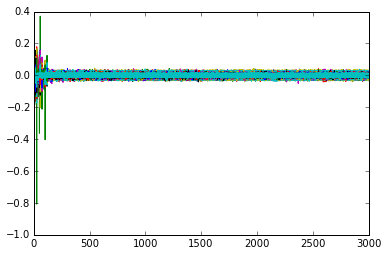

In [16]:
for k in range(0, 256):
    plt.plot(cpaoutput[k])

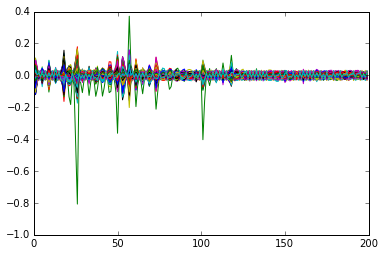

In [17]:
x = np.arange(200)
for k in range(0, 256):
    plt.plot(x, cpaoutput[k][0:200])

In [18]:
#Set 16 to something lower (like 1) to only go through a single subkey
print "start",
bestguess = [0]*16
for bnum in range(0, 1):
    dpaoutput = [0]*256
    maxdpa = [0]*256
    for kguess in range(0, 256):
        print "Subkey %2d, hyp = %02x: "%(bnum, kguess),


        #Initialize arrays & variables to zero
        lsb1 = []
        lsb0 = []

        #For each trace, do the following
        for tnum in range(0, numtraces-1):
            if intermediate(pt[tnum][bnum], kguess) & 1 == 1 :
                lsb1.append(traces[tnum])
            else:
                lsb0.append(traces[tnum])
        
        lsb1a = np.array(lsb1)
        lsb0a = np.array(lsb0)
        mean1 = np.mean(lsb1a, axis=0, dtype=np.float64)
        mean0 = np.mean(lsb0a, axis=0, dtype=np.float64)
        dpaoutput[kguess] = mean1 - mean0
        maxdpa[kguess] = max(abs(dpaoutput[kguess]))

        print maxdpa[kguess]

    #Find maximum value of key
    bestguess[bnum] = np.argmax(maxdpa)

print "Best Key Guess: ",
for b in bestguess: print "%02x "%b,

start Subkey  0, hyp = 00:  0.00458641600675
Subkey  0, hyp = 01:  0.00503914459007
Subkey  0, hyp = 02:  0.00268764956878
Subkey  0, hyp = 03:  0.00165868280072
Subkey  0, hyp = 04:  0.0033642178939
Subkey  0, hyp = 05:  0.00286925439231
Subkey  0, hyp = 06:  0.00355363233486
Subkey  0, hyp = 07:  0.00644676101483
Subkey  0, hyp = 08:  0.00122603514281
Subkey  0, hyp = 09:  0.00192508095324
Subkey  0, hyp = 0a:  0.00343240343626
Subkey  0, hyp = 0b:  0.00456907136802
Subkey  0, hyp = 0c:  0.00266555016183
Subkey  0, hyp = 0d:  0.00468209414387
Subkey  0, hyp = 0e:  0.00366195522519
Subkey  0, hyp = 0f:  0.00271978835031
Subkey  0, hyp = 10:  0.00332891172219
Subkey  0, hyp = 11:  0.00141181638475
Subkey  0, hyp = 12:  0.00178816092048
Subkey  0, hyp = 13:  0.00225711999934
Subkey  0, hyp = 14:  0.00754556291411
Subkey  0, hyp = 15:  0.00592248633225
Subkey  0, hyp = 16:  0.00871063277965
Subkey  0, hyp = 17:  0.00295529049041
Subkey  0, hyp = 18:  0.00145177245485
Subkey  0, hyp = 19:

In [ ]:
for k in range(0, 256):
    plt.plot(dpaoutput[k])

In [ ]:
x = np.arange(200)
for k in range(0, 256):
    plt.plot(x, dpaoutput[k][0:200])

In [ ]:
#Set 16 to something lower (like 1) to only go through a single subkey
print "start",
bestguess = [0]*16
dpavsd = np.zeros((256, numtraces))

for bnum in range(0, 1):
    dpaoutput = [0]*256
    maxdpa = [0]*256
    for kguess in range(0, 256):
        # print "Subkey %2d, hyp = %02x: "%(bnum, kguess),
        #Initialize arrays & variables to zero
        lsb1 = []
        lsb0 = []
        print kguess
        #For each trace, do the following
        for tnum in range(0, 1000):
            if intermediate(pt[tnum][bnum], kguess) & 1 == 1 :
                lsb1.append(traces[tnum])
            else:
                lsb0.append(traces[tnum])
            if tnum >=10:
                lsb1a = np.array(lsb1)
                lsb0a = np.array(lsb0)
                mean1 = np.mean(lsb1a, axis=0, dtype=np.float64)
                mean0 = np.mean(lsb0a, axis=0, dtype=np.float64)
                dpaoutput[kguess] = mean1 - mean0
                maxdpa[kguess] = max(abs(dpaoutput[kguess]))
                dpavsd[kguess][tnum] = maxdpa[kguess]
        # print maxdpa[kguess]
    #Find maximum value of key
    bestguess[bnum] = np.argmax(maxdpa)
print "Best Key Guess: ",
for b in bestguess: print "%02x "%b,

In [ ]:
for k in range(0, 256):
    plt.plot(dpavsd[k])